In [1]:
import pdfplumber
"""
This script extracts text from a PDF file using the pdfplumber library.
The script performs the following steps:
1. Imports the pdfplumber library.
2. Defines the path to the PDF file.
3. Initializes a variable to store all extracted text.
4. Opens the PDF file and iterates through each page.
5. Extracts text from each page and appends it to the all_text variable.
6. Prints the concatenated text from all pages.
Variables:
    pdf_path (str): The path to the PDF file.
    all_text (str): A variable to store the concatenated text from all pages.
Usage:
    Run the script to extract and print the text from the specified PDF file.
"""

pdf_path = "LAUTECH 2ND VERIFIED DATA.pdf"

# Initialize a variable to store all text
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        # Extract text from the current page
        text = page.extract_text()
        
        # Append the text to the all_text variable
        if text:  # Check if text is not None
            all_text += f"\n{text}\n\n"

# Now all_text contains the concatenated text from all pages
print("All Extracted Text:")
print(all_text)

All Extracted Text:

sn first_name middle_name last_name matric_numberjamb_number institution location current fees account_name account_number level course_of_study
1Bukunmi Emmanuel Adekunle 2022001947 202210144649BA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 ADEKUNLE BUKUNMI EMMANUEL 2302285619 200BNSC Nursing
2John Sunday Okyere 2022008283 202210769930FF Ladoke Akintola University of Technology Oyo State OYO 126,000.00 OKYERE JOHN SUNDAY 6548306014 200B.Tech Computer Science
3Lateef Kewulabi Kareem 2022010541 202211356201CA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 KAREEM KEWULABI LATEEF 2074877766 200B.Tech ESTATE MANAGEMENT
4Ebenezer Oluwafunmisho Agoro 2022004301 202211380445CA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 AGORO EBENEZER OLUWAFUNMISHO 8484391013 200B.Sc Economics
5Waris Olamilekan Buliamin 2022010291 202210648196GA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 BULIAMIN WARIS O

In [2]:
data = all_text
"""
Assigns the content of the variable `all_text` to the variable `data`.

Variables:
    data (str): A string containing the text data from the variable `all_text`.
"""

'\nAssigns the content of the variable `all_text` to the variable `data`.\n\nVariables:\n    data (str): A string containing the text data from the variable `all_text`.\n'

In [3]:
import pandas as pd
import re

# Split the data into rows
rows = data.strip().split("\n")

# Define the column headers
columns = [
    "sn", "first_name", "middle_name", "last_name", "matric_number", "jamb_number",
    "institution", "location", "current_fees", "account_name", "account_number",
    "level", "course_of_study"
]

# Initialize lists to store processed data and inconsistent lines
processed_data = []
inconsistent_lines = []

# Process each row
for row in rows:
    try:
        # Use regex to separate sn and the rest of the row
        match = re.match(r"(\d+)(.*)", row)
        if match:
            sn = match.group(1)
            rest = match.group(2).strip()
            # Split the rest of the data by spaces
            parts = rest.split()
            if len(parts) < 19:  # Check if the line has enough fields
                raise ValueError("Insufficient fields in line")
            
            # Extract individual fields from the parts
            first_name, middle_name, last_name = parts[0], parts[1], parts[2]
            matric_number, jamb_number = parts[3], parts[4]
            institution = " ".join(parts[5:12])  # Multi-word institution name
            location = parts[12]
            current_fees = parts[13]
            account_name = " ".join(parts[14:17])  # Multi-word account name
            account_number = parts[17]
            level = parts[18][:3]  # Extract level
            course_of_study = " ".join(parts[18:]).replace(level, "").strip()  # Remove level from course
            
            # Append the processed data to the list
            processed_data.append([
                sn, first_name, middle_name, last_name, matric_number, jamb_number,
                institution, location, current_fees, account_name, account_number,
                level, course_of_study
            ])
        else:
            raise ValueError("SN and rest split failed")
    except Exception as e:
        # Append the inconsistent line and error message to the list
        inconsistent_lines.append((row, str(e)))

# Create a DataFrame for the processed data
df = pd.DataFrame(processed_data, columns=columns)

# Display the DataFrame
print("Processed DataFrame:")
print(df)

# Display inconsistent lines
print("\nInconsistent Lines:")
for line, error in inconsistent_lines:
    print(f"Line: {line}\nError: {error}\n")


Processed DataFrame:
      sn first_name    middle_name last_name matric_number     jamb_number  \
0      1    Bukunmi       Emmanuel  Adekunle    2022001947  202210144649BA   
1      2       John         Sunday    Okyere    2022008283  202210769930FF   
2      3     Lateef       Kewulabi    Kareem    2022010541  202211356201CA   
3      4   Ebenezer  Oluwafunmisho     Agoro    2022004301  202211380445CA   
4      5      Waris     Olamilekan  Buliamin    2022010291  202210648196GA   
..   ...        ...            ...       ...           ...             ...   
659  662   Abdsalam       Adekunle   Adewale    2021000020      10540369CA   
660  663    Tiamiyu          Taiwo  Oyeladun    2021001172      10630857FJ   
661  664      Basit      Olasubomi  Oyetunji    2021005328      10669788FE   
662  665   Damilola         Esther    Sunday        205782      21884122BA   
663  666     Victor    Oluwarotimi  Adesokan        203844      21960277JA   

                                          

In [4]:
df
"""
This code snippet references a DataFrame object named 'df' which is likely used for loan data analysis.

Attributes:
    df (DataFrame): A pandas DataFrame containing loan data. The specific structure and contents of this DataFrame are not detailed in the snippet.

Note:
    The file path provided suggests that this code is part of a Jupyter Notebook located at:
    /c:/Users/DELL/Desktop/loan data/Loan Data Analysis.ipynb
"""

"\nThis code snippet references a DataFrame object named 'df' which is likely used for loan data analysis.\n\nAttributes:\n    df (DataFrame): A pandas DataFrame containing loan data. The specific structure and contents of this DataFrame are not detailed in the snippet.\n\nNote:\n    The file path provided suggests that this code is part of a Jupyter Notebook located at:\n    /c:/Users/DELL/Desktop/loan data/Loan Data Analysis.ipynb\n"

In [5]:
# Drop unnecessary columns
"""
This code snippet performs the following operations:
1. Drops unnecessary columns from the DataFrame `df`.
    The columns to be dropped are specified in the list `columns_to_drop`:
    - 'jamb_number'
    - 'institution'
    - 'location'
    - 'current_fees'
    - 'account_name'
2. Displays the cleaned DataFrame `df` after the specified columns have been removed.
"""
columns_to_drop = ['jamb_number', 'institution', 'location', 'current_fees', 'account_name']
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,BNSC Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,B.Tech Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,B.Tech ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,B.Sc Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,B.Tech Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,B.Sc Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,B.Tech Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,B.Tech Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,B.Tech Pure And Applied Biology


In [6]:
df.sample(100)

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
175,178,Adebola,Adejumoke,Faleye,2022009403,8146837048,200,B.Tech Agricultural Economics
228,231,Emmanuel,Abiodun,Kayode,2022009517,2245073584,200,MBBS Medicine
486,489,Oluwaseun,Oyedele,Odeniyi,2022009336,239431283,400,B.Tech Computer Science
440,443,Mukhtar,Adigun,Monsur,202560,421913030,400,BNSC Nursing
122,125,Testimony,Victoria,Adegoke,2022007307,1865456162,200,B.A ENGLISH AND LITERARY STUDIES
...,...,...,...,...,...,...,...,...
245,248,Abdbasheet,Babatunde,Isiaq,196924,238906704,300,B.Tech Agricultural Extension And Rural Develo...
95,98,Sulaikho,Olaitan,Dawud,2022005920,2241725933,200,B.Tech Pure And Applied Biology
437,440,Oladayo,David,Olaniran,204418,2156625465,400,B.Tech Animal Production and Health
624,627,Rebecca,Titilayo,Gbadegesin,2022009045,3109189834,400,B.Tech Pure And Applied Biology


In [7]:
df["level"].value_counts()
"""
Counts the unique values in the "level" column of the DataFrame `df`.

Returns:
    pandas.Series: A series containing counts of unique values in the "level" column, sorted in descending order.
"""

'\nCounts the unique values in the "level" column of the DataFrame `df`.\n\nReturns:\n    pandas.Series: A series containing counts of unique values in the "level" column, sorted in descending order.\n'

In [8]:
# Filter the DataFrame to keep only rows where the level is 400, 300, or 200
"""
Filters the DataFrame to keep only rows where the 'level' column has values '400', '300', or '200',
and then displays the filtered DataFrame.

Returns:
    DataFrame: A DataFrame containing only the rows where the 'level' column is '400', '300', or '200'.
"""
df = df[df['level'].isin(['400', '300', '200'])]

# Display the filtered DataFrame
df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,BNSC Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,B.Tech Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,B.Tech ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,B.Sc Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,B.Tech Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,B.Sc Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,B.Tech Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,B.Tech Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,B.Tech Pure And Applied Biology


In [9]:
df["level"].value_counts()
"""
Counts the unique values in the "level" column of the DataFrame `df`.

This function will return a Series containing counts of unique values in the "level" column, 
sorted in descending order. It is useful for understanding the distribution of values in 
the "level" column.

Returns:
    pandas.Series: A series containing counts of unique values in the "level" column.
"""

'\nCounts the unique values in the "level" column of the DataFrame `df`.\n\nThis function will return a Series containing counts of unique values in the "level" column, \nsorted in descending order. It is useful for understanding the distribution of values in \nthe "level" column.\n\nReturns:\n    pandas.Series: A series containing counts of unique values in the "level" column.\n'

In [10]:
# Define a function to clean the course_of_study column
def clean_course_of_study(course):
    # Split the course name by spaces and remove the first part (degree type)
    parts = course.split()
    if len(parts) > 1:
        return " ".join(parts[1:])
    return course

# Apply the function to the course_of_study column
df['course_of_study'] = df['course_of_study'].apply(clean_course_of_study)

# Display the cleaned DataFrame
df

C:\Users\user\AppData\Local\Temp\ipykernel_12964\3509205099.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['course_of_study'] = df['course_of_study'].apply(clean_course_of_study)


,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,Pure And Applied Biology


In [11]:
df["course_of_study"].value_counts()

course_of_study
Computer Science                                44
Pure and Applied Chemistry                      30
Cyber Security Science                          27
Animal Nutrition And Biotechnology              22
Animal Production and Health                    22
Information System Science                      21
Nursing                                         20
Agricultural Economics                          20
Biochemistry                                    19
Science Laboratory Technology                   19
Crop Production and Soil Science                18
Mechanical Engineering                          18
Food Science                                    17
Electronic/Electrical Engineering               17
Nutrition and Dietetics                         17
Anatomy                                         17
Civil Engineering                               16
Physiology                                      15
Agricultural Extension And Rural Development    15
Pure And Applie

In [12]:

# Mapping departments to faculties
faculty_map = {
    "Pure and Applied Chemistry": "Pure and Applied Science",
    "Science Laboratory Technology": "Pure and Applied Science",
    "Pure And Applied Biology": "Pure and Applied Science",
    "Pure And Applied Physics": "Pure and Applied Science",
    "Pure And Applied Mathematics": "Pure and Applied Science",
    "Earth Science": "Pure and Applied Science",
    "Statistics": "Pure and Applied Science",
    "Nursing": "Medical Science",
    "Biochemistry": "Medical Science",
    "Anatomy": "Medical Science",
    "Medical Laboratory Science": "Medical Science",
    "Physiology": "Medical Science",
    "Medicine": "Medical Science",
    "Animal Nutrition And Biotechnology ": "Agricultural Science",
    "Animal Production and Health": "Agricultural Science",
    "Agricultural Economics": "Agricultural Science",
    "Crop Production and Soil Science": "Agricultural Science",
    "Agricultural Extension And Rural Development": "Agricultural Science",
    "Crop and Environmental Protection": "Agricultural Science",
    "FISHERIES AND AQUACULTURE": "Agricultural Science",
    "WILDLIFE AND ECOTOURISM": "Agricultural Science",
    "Computer Science": "Information Science",
    "Cyber Security Science": "Information Science",
    "Information System Science": "Information Science",
    "Food Science": "Food and consumer Science",
    "Nutrition and Dietetics": "Food and consumer Science",
    "Consumer and Home Economics": "Food and consumer Science",
    "Economics": "Management Science",
    "Accounting": "Management Science",
    "Marketing": "Management Science",
    "Business Management": "Management Science",
    "Transport Management": "Management Science",
    "LIBRARY AND INFORMATION SCIENCE": "Social Science",
    "PHILOSOPHY": "Social Science",
    "ENGLISH AND LITERARY STUDIES": "Social Science",
    "SOCIOLOGY": "Social Science",
    "Architecture": "Art Science",
    "BUILDING": "Art Science",
    "Urban and Regional Planning": "Art Science",
    "ESTATE MANAGEMENT": "Art Science",
    "SURVEYING AND GEOINFORMATICS": "Art Science",
    "Mechanical Engineering ": "Engineering",
    "Electronic/Electrical Engineering": "Engineering",
    "Civil Engineering": "Engineering",
    "Computer Engineering": "Engineering",
    "Chemical Engineering": "Engineering",
    "Computer Science and Engineering": "Engineering",
    "Food Engineering": "Engineering",
    "Agricultural Engineering": "Engineering",
    "Animal Nutrition And Biotechnology": "Agricultural Science",
    "Mechanical Engineering":"Engineering"
    
    
    
    # Add more mappings here as needed
}

# Add a new column for faculties based on the mapping
df["faculty"] = df["course_of_study"].map(faculty_map)

# Group by faculty and display
grouped = df.groupby("faculty")

# Display each group
for faculty, group in grouped:
    print(f"Faculty: {faculty}")
    print(group)
    print("-" * 40)


Faculty: Agricultural Science
      sn  first_name middle_name   last_name matric_number account_number  \
8      9    Temidire    Emmanuel      Bolude    2022004115      270142300   
10    11      Eniola       Salma  Animashaun    2022008434       12782718   
35    37      Mariam     Ayomide    Adekunle    2022010848     2146075537   
56    59     Mistura     Olamide      Fawole    2022008090      786252115   
64    67    Temitope       Fawas      Salawu    2022005017      682822850   
..   ...         ...         ...         ...           ...            ...   
613  616      Abibat     Wuraola       Bello    2021005718      649124156   
616  619      Dorcas    Darasimi    Ogunsola    2021007120     2197301160   
618  621      Eniola     Abigeal  Adegboyega    2021004729     8105003792   
623  626  Abdulazeez    Abimbola     Adeleye    2021004065     2294468214   
633  636    Temidayo       Faith     Makinde    2021003818      684468106   

    level                     course_of_study

C:\Users\user\AppData\Local\Temp\ipykernel_12964\1488043012.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["faculty"] = df["course_of_study"].map(faculty_map)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 0 to 663
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sn               609 non-null    object
 1   first_name       609 non-null    object
 2   middle_name      609 non-null    object
 3   last_name        609 non-null    object
 4   matric_number    609 non-null    object
 5   account_number   609 non-null    object
 6   level            609 non-null    object
 7   course_of_study  609 non-null    object
 8   faculty          609 non-null    object
dtypes: object(9)
memory usage: 47.6+ KB


In [14]:
# Find rows that were not mapped (NaN in the 'faculty' column)
unmapped_rows = df[df["faculty"].isna()]

# Display unmapped rows
print("Unmapped rows:")
print(unmapped_rows)

Unmapped rows:
Empty DataFrame
Columns: [sn, first_name, middle_name, last_name, matric_number, account_number, level, course_of_study, faculty]
Index: []


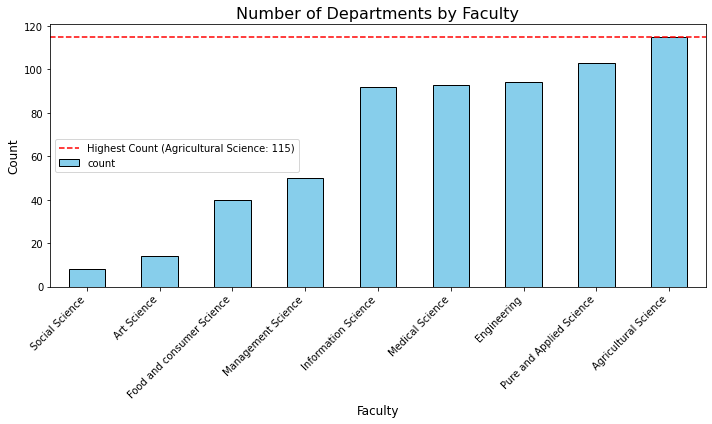

In [15]:

import matplotlib.pyplot as plt


# Count the number of entries for each faculty
faculty_counts = df["faculty"].value_counts()

# Find the faculty with the highest count
highest_count = faculty_counts.idxmax()
highest_count_value = faculty_counts.max()

# Create a bar chart
plt.figure(figsize=(10, 6))
faculty_counts.sort_values().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Departments by Faculty", fontsize=16)
plt.xlabel("Faculty", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.axhline(y=highest_count_value, color="red", linestyle="--", label=f"Highest Count ({highest_count}: {highest_count_value})")
plt.legend()
plt.tight_layout()

# Show the bar chart
plt.show()





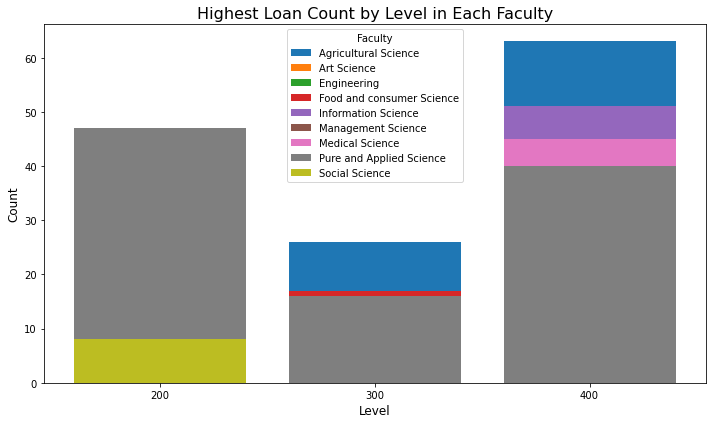

In [16]:


# Group by faculty and level to count occurrences
faculty_level_counts = df.groupby(["faculty", "level"]).size().reset_index(name="count")

# Find the level with the highest count in each faculty
highest_counts = faculty_level_counts.loc[faculty_level_counts.groupby("faculty")["count"].idxmax()]

# Plot the result
plt.figure(figsize=(10, 6))
for faculty in highest_counts["faculty"].unique():
    faculty_data = faculty_level_counts[faculty_level_counts["faculty"] == faculty]
    plt.bar(faculty_data["level"], faculty_data["count"], label=faculty)

plt.title("Highest Loan Count by Level in Each Faculty", fontsize=16)
plt.xlabel("Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Faculty")
plt.xticks(faculty_level_counts["level"].unique())
plt.tight_layout()

# Show the plot
plt.show()


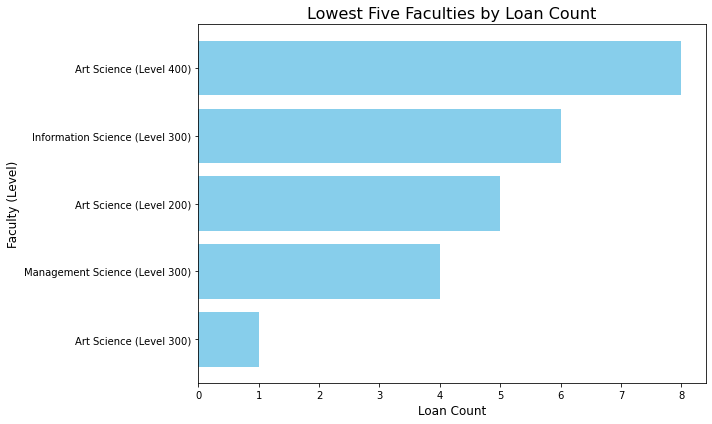

In [17]:


# Group by faculty and level to count occurrences
faculty_level_counts = df.groupby(["faculty", "level"]).size().reset_index(name="count")

# Sort by count to find the lowest five
lowest_five = faculty_level_counts.nsmallest(5, "count")

# Plot the result
plt.figure(figsize=(10, 6))
plt.barh(lowest_five["faculty"] + " (Level " + lowest_five["level"].astype(str) + ")", lowest_five["count"], color="skyblue")
plt.title("Lowest Five Faculties by Loan Count", fontsize=16)
plt.xlabel("Loan Count", fontsize=12)
plt.ylabel("Faculty (Level)", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()



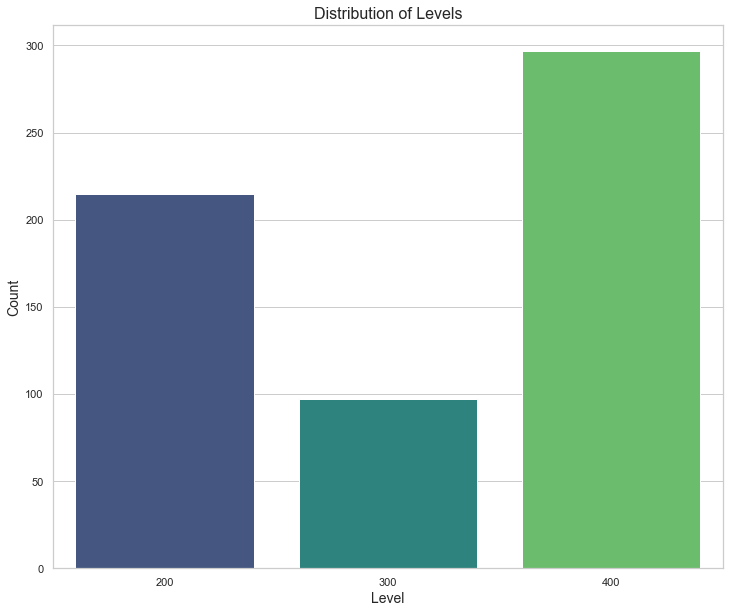

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the distribution of levels
sns.countplot(ax=ax, data=df, x='level', palette='viridis')
ax.set_title('Distribution of Levels', fontsize=16)
ax.set_xlabel('Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Show the plots
plt.show()

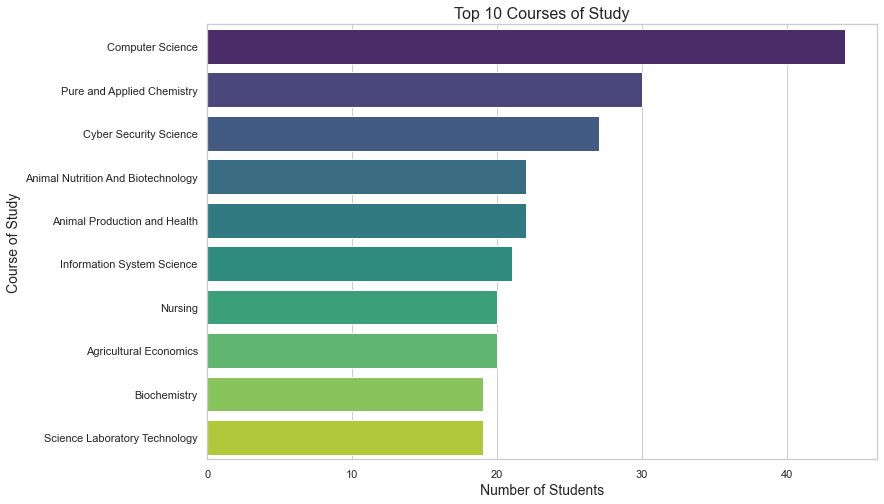

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get the top 10 courses of study
top_courses = df['course_of_study'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_courses.values, y=top_courses.index, palette='viridis')
plt.title('Top 10 Courses of Study', fontsize=16)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Course of Study', fontsize=14)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


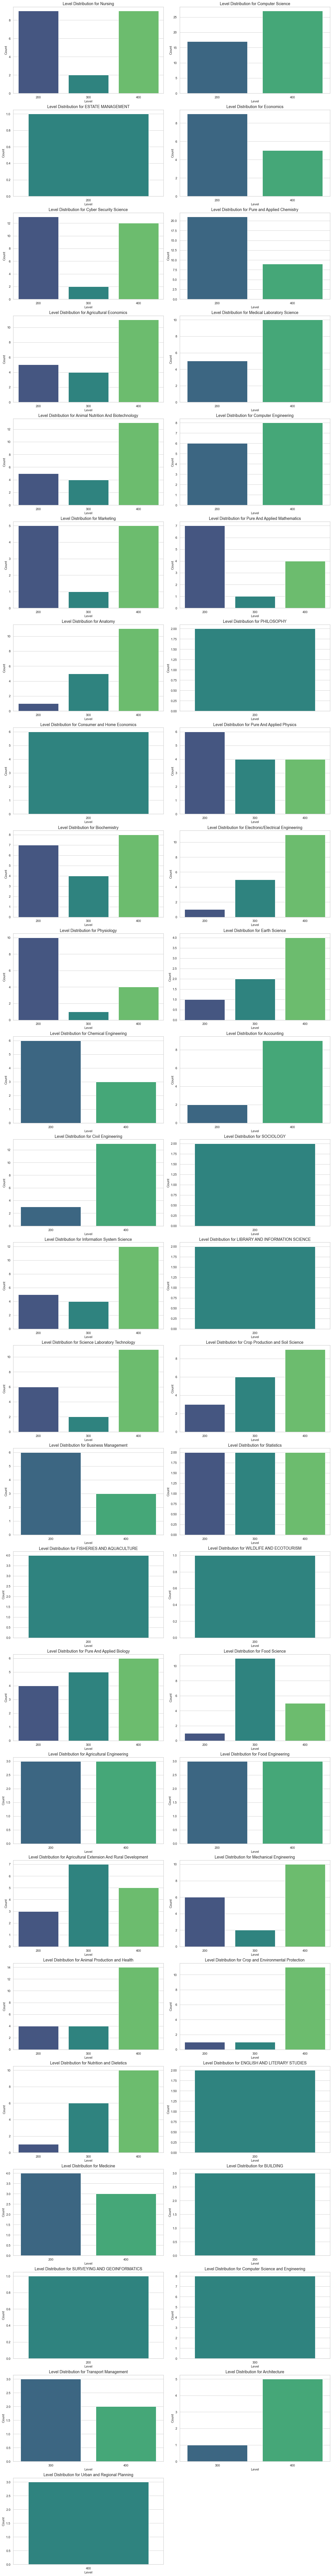

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_level_distribution_all_courses(df):
    # Get the unique courses of study
    unique_courses = df['course_of_study'].unique()
    
    # Set the number of rows and columns for the subplots
    n_courses = len(unique_courses)
    n_cols = 2  # Set the number of columns
    n_rows = (n_courses + n_cols - 1) // n_cols  # Calculate rows based on the number of courses

    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten axes to easily index them

    # Loop through each course and plot
    for i, course in enumerate(unique_courses):
        ax = axes[i]
        df_course = df[df['course_of_study'] == course]
        
        # Plot the distribution of levels for the current course
        sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')
        ax.set_title(f'Level Distribution for {course}', fontsize=14)
        ax.set_xlabel('Level', fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=0)
    
    # Hide any unused subplots
    for i in range(len(unique_courses), len(axes)):
        fig.delaxes(axes[i])
    
    # Show the plot
    plt.show()

# Call the function to generate the subplot chart
plot_level_distribution_all_courses(df)


In [21]:
def filter_by_level_and_course(df, level, course_of_study):
    """
    Filters the DataFrame based on the specified level and course of study.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    level (str): The level to filter by.
    course_of_study (str): The course of study to filter by.

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    filtered_df = df[(df['level'] == level) & (df['course_of_study'] == course_of_study)]
    return filtered_df


In [22]:
# Filter DataFrame based on level and course of study
filtered_df = filter_by_level_and_course(df, '400', 'Computer Science')
filtered_df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study,faculty
348,351,Maleek,Taiwo,Olayinka,2021002112,6555116378,400,Computer Science,Information Science
371,374,Heritage,Onaolapo,Kolade,2022010954,471437805,400,Computer Science,Information Science
420,423,Faith,Samuel,Olayiwola,2021005304,8051492818,400,Computer Science,Information Science
431,434,Shukurat,Olanike,Mojoyinola,2021001388,1527066298,400,Computer Science,Information Science
441,444,Taofeek,Akorede,Adedokun,2021001114,8160209676,400,Computer Science,Information Science
442,445,Feranmi,Damilola,Olopade,2021002292,2271354693,400,Computer Science,Information Science
461,464,Mary,Omotayo,Adewusi,2021004500,2241407604,400,Computer Science,Information Science
463,466,Ayomide,Oluwadamilare,Adeleke,205555,2126030310,400,Computer Science,Information Science
471,474,Oreoluwa,Samuel,Babatunde,2021003701,661465454,400,Computer Science,Information Science
475,478,Ibrahim,Yemi,Aminulahi,2021000003,676873499,400,Computer Science,Information Science
